In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("breast-cancer.csv")
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [3]:
df = df.drop(['id'], axis=1)

In [4]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")
    print("\n")

diagnosis: ['M' 'B']


radius_mean: [17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   11

compactness_worst: [0.6656  0.1866  0.4245  0.8663  0.205   0.5249  0.2576  0.3682  0.5401
 1.058   0.1551  0.5609  0.3903  0.1924  0.7725  0.6577  0.1871  0.4233
 0.315   0.1773  0.2776  0.1148  0.5954  0.26    0.3578  0.3949  0.6643
 0.2117  0.611   0.2812  0.4257  0.5775  0.3559  0.659   0.5804  0.3835
 0.4238  0.04619 0.05131 0.4225  0.2043  0.2698  0.7444  0.3724  0.3904
 0.509   0.1357  0.4166  0.2156  0.1711  0.08615 0.1582  0.08906 0.2297
 0.2057  0.0872  0.3511  0.429   0.06191 0.1239  0.09866 0.1698  0.6247
 0.1678  0.4061  0.3416  0.1664  0.09148 0.4365  0.07061 0.2336  0.2436
 0.7394  0.3542  0.1843  0.2045  0.1379  0.5634  0.6164  0.2141  0.1676
 0.4791  0.6076  0.2817  0.2003  0.2089  0.1976  0.3206  0.2463  0.3089
 0.1766  0.1997  0.1238  0.1751  0.4203  0.3539  0.09358 0.09473 0.1851
 0.3026  0.1943  0.1202  0.08862 0.2302  0.1486  0.4099  0.266   0.1963
 0.6997  0.2196  0.1765  0.225   0.4193  0.2049  0.2364  0.2399  0.1879
 0.448   0.4925  0.239   0.2291  0.4244  0.17

In [9]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

df['diagnosis'].unique()

array([1, 0])

In [11]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

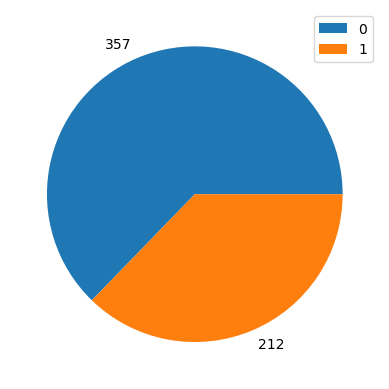

In [12]:
plt.pie(x=df['diagnosis'].value_counts(),labels=df['diagnosis'].value_counts(ascending=False))
plt.legend([0, 1], loc="upper right")
plt.show()

In [13]:
# df['radius_mean'].unique()

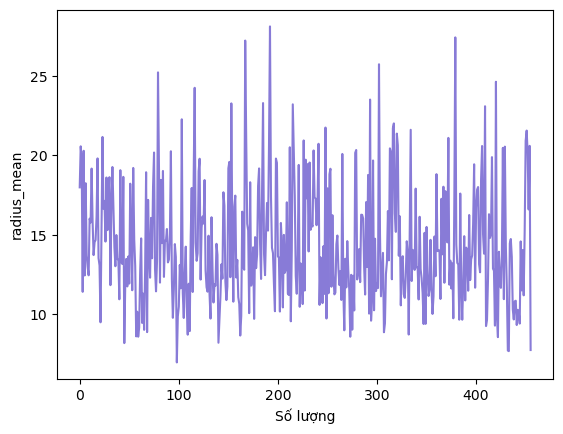

In [14]:
plt.plot(range(len(df['radius_mean'].unique())), df['radius_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("radius_mean");

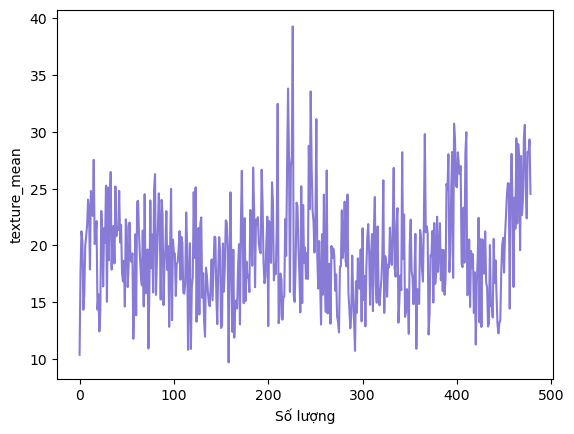

In [15]:
plt.plot(range(len(df['texture_mean'].unique())), df['texture_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("texture_mean");

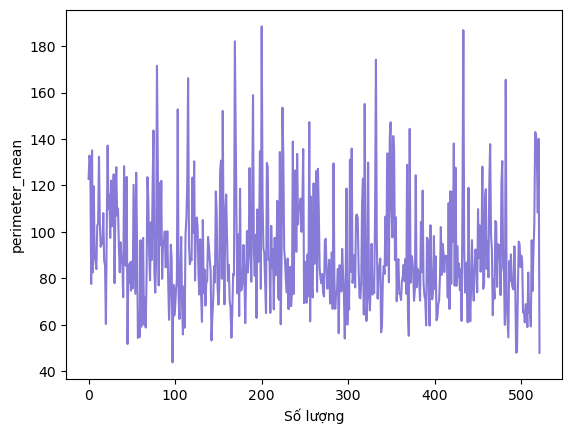

In [34]:
plt.plot(range(len(df['perimeter_mean'].unique())), df['perimeter_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("perimeter_mean");

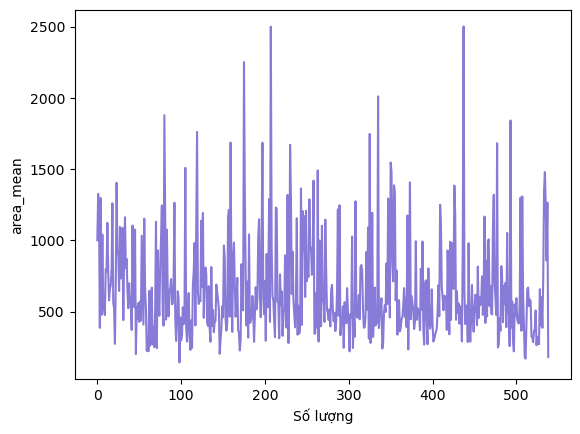

In [35]:
plt.plot(range(len(df['area_mean'].unique())), df['area_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("area_mean");

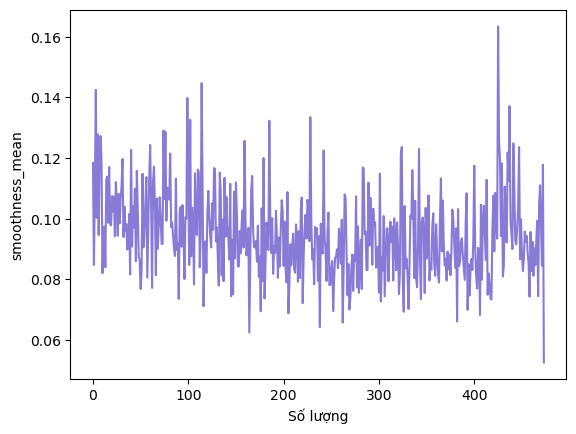

In [36]:
plt.plot(range(len(df['smoothness_mean'].unique())), df['smoothness_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("smoothness_mean");

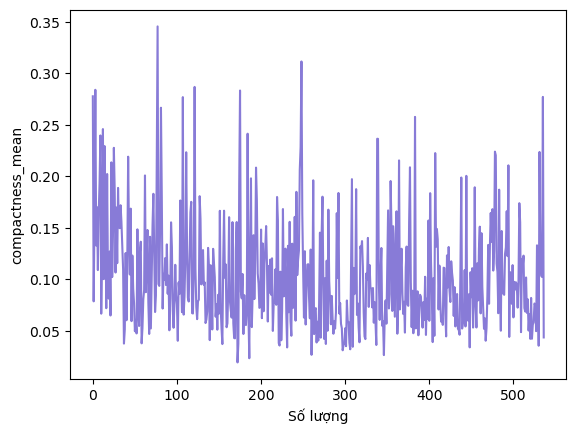

In [37]:
plt.plot(range(len(df['compactness_mean'].unique())), df['compactness_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("compactness_mean");

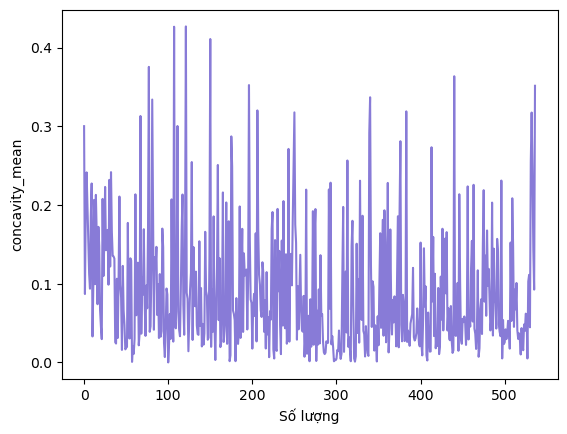

In [38]:
plt.plot(range(len(df['concavity_mean'].unique())), df['concavity_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("concavity_mean");

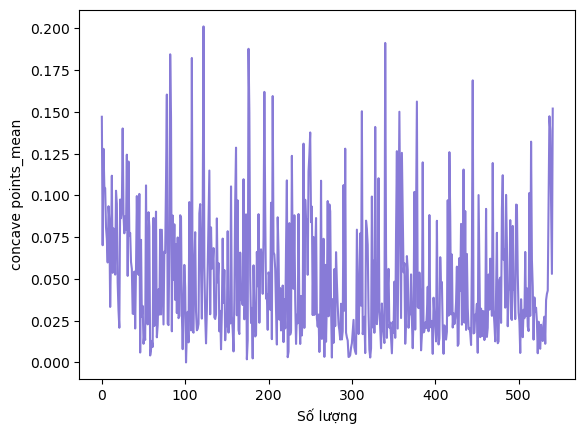

In [39]:
plt.plot(range(len(df['concave points_mean'].unique())), df['concave points_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("concave points_mean");

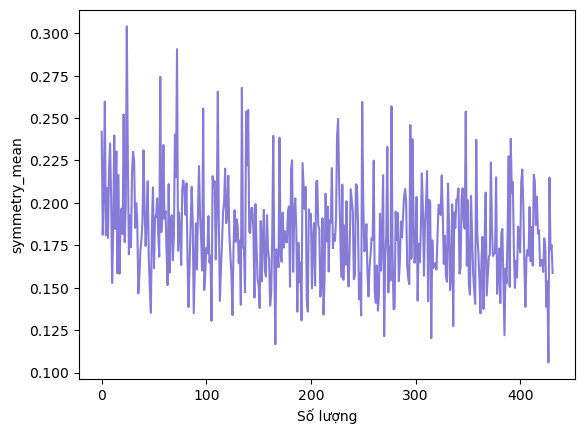

In [40]:
plt.plot(range(len(df['symmetry_mean'].unique())), df['symmetry_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("symmetry_mean"); 

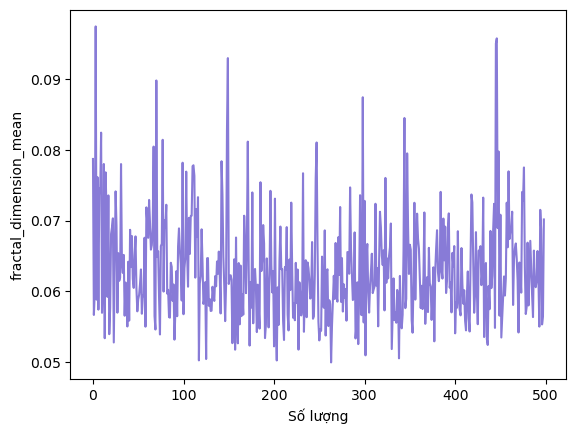

In [41]:
plt.plot(range(len(df['fractal_dimension_mean'].unique())), df['fractal_dimension_mean'].unique(), color="Slateblue", alpha=0.8)
plt.xlabel("Số lượng")
plt.ylabel("fractal_dimension_mean"); 

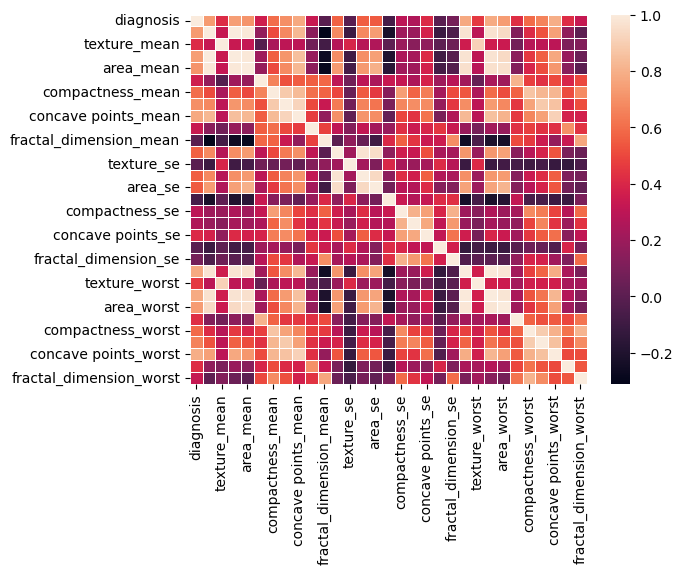

In [47]:
sns.heatmap(df.corr(), annot=False, linewidths=0.5);

In [45]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [16]:
data = df[['diagnosis', 'concave points_worst', 
          'area_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean',
         'area_mean', 'radius_mean']]

In [17]:
data.corr()

,diagnosis,concave points_worst,area_worst,perimeter_worst,radius_worst,concave points_mean,area_mean,radius_mean
diagnosis,1.000000,0.793566,0.733825,0.782914,0.776454,0.776614,0.708984,0.730029
concave points_worst,0.793566,1.000000,0.747419,0.816322,0.787424,0.910155,0.722017,0.744214
area_worst,0.733825,0.747419,1.000000,0.977578,0.984015,0.809630,0.959213,0.941082
perimeter_worst,0.782914,0.816322,0.977578,1.000000,0.993708,0.855923,0.959120,0.965137
radius_worst,0.776454,0.787424,0.984015,0.993708,1.000000,0.830318,0.962746,0.969539
concave points_mean,0.776614,0.910155,0.809630,0.855923,0.830318,1.000000,0.823269,0.822529
area_mean,0.708984,0.722017,0.959213,0.959120,0.962746,0.823269,1.000000,0.987357
radius_mean,0.730029,0.744214,0.941082,0.965137,0.969539,0.822529,0.987357,1.000000


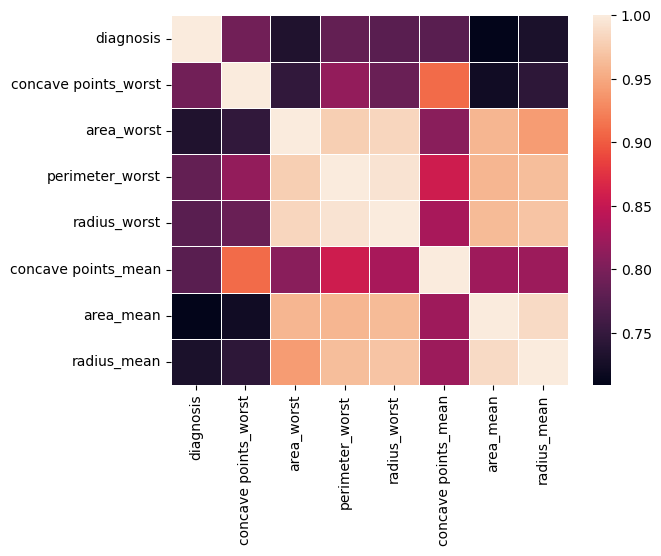

In [18]:
sns.heatmap(data.corr(), annot=False, linewidths=0.5);

In [19]:
X = data.drop(['diagnosis'], axis=1)

In [20]:
X.head()

,concave points_worst,area_worst,perimeter_worst,radius_worst,concave points_mean,area_mean,radius_mean
0,0.2654,2019.0,184.60,25.38,0.14710,1001.0,17.99
1,0.1860,1956.0,158.80,24.99,0.07017,1326.0,20.57
2,0.2430,1709.0,152.50,23.57,0.12790,1203.0,19.69
3,0.2575,567.7,98.87,14.91,0.10520,386.1,11.42
4,0.1625,1575.0,152.20,22.54,0.10430,1297.0,20.29


In [21]:
y = data['diagnosis']

In [22]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=43)

In [24]:
X_train

,concave points_worst,area_worst,perimeter_worst,radius_worst,concave points_mean,area_mean,radius_mean
415,0.08263,522.9,85.09,13.05,0.021790,433.8,11.89
256,0.19410,1926.0,178.60,25.05,0.114400,1207.0,19.55
420,0.06664,520.5,86.43,13.07,0.014280,409.7,11.57
448,0.09594,830.5,108.10,16.30,0.029250,659.7,14.53
195,0.08235,600.6,90.81,13.88,0.023770,516.4,12.91
...,...,...,...,...,...,...,...
16,0.16090,1138.0,123.40,19.07,0.052590,684.5,14.68
58,0.01111,624.1,90.24,14.23,0.004167,527.2,13.05
277,0.12940,1236.0,129.00,19.96,0.058430,1102.0,18.81
255,0.13740,826.0,108.10,16.39,0.052460,602.4,13.96


In [25]:
y_train

415    0
256    1
420    0
448    0
195    0
      ..
16     1
58     0
277    1
255    1
320    0
Name: diagnosis, Length: 455, dtype: int32

In [26]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [27]:
# USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

logis_model = LogisticRegression(max_iter=500)
logis_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [34]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix

y_pred_logis = logis_model.predict(X_test)
print(classification_report( y_true=y_test,y_pred=y_pred_logis))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



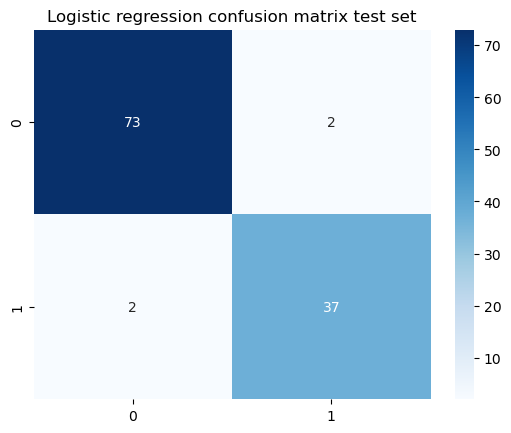

In [105]:
logis_cf_matrx_val = confusion_matrix(y_true=y_test, y_pred=y_pred_logis)
plt.title("Logistic regression confusion matrix test set")
sns.heatmap(logis_cf_matrx_val, annot=True,cmap="Blues",fmt="d" );

In [103]:
# Khởi tạo Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)

# Định nghĩa grid các tham số để tìm kiếm
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Kết quả tốt nhất
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Dự đoán trên tập test
y_pred = grid_search.best_estimator_.predict(X_test)

# Đánh giá mô hình
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\Lib\

D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anacond

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9626373626373625

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



D:\anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [111]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 3, 5, 7],
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Kết quả tốt nhất
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Dự đoán trên tập test
y_pred = grid_search.best_estimator_.predict(X_test)

# Đánh giá mô hình
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'n_neighbors': 3}
Best Score: 0.956043956043956

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



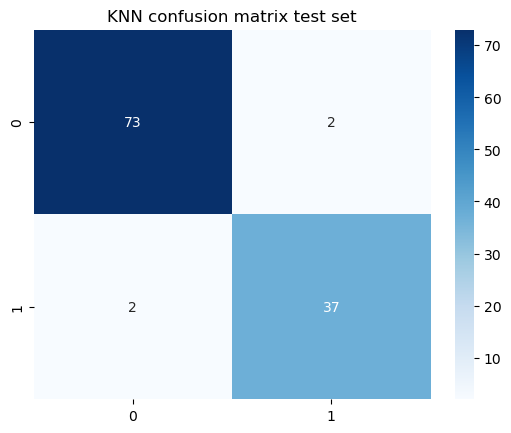

In [112]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
knn_cf_matrx_val = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
plt.title("KNN confusion matrix test set")
sns.heatmap(logis_cf_matrx_val, annot=True,cmap="Blues",fmt="d" );

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        75
           1       0.88      0.95      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



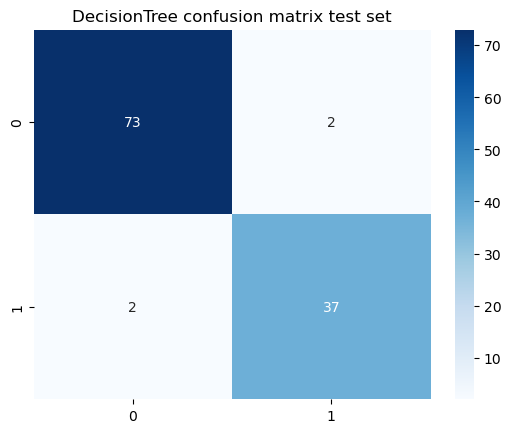

In [114]:
y_pred_dt = dt_model.predict(X_test)
knn_cf_matrx_val = confusion_matrix(y_true=y_test, y_pred=y_pred_dt)
plt.title("DecisionTree confusion matrix test set")
sns.heatmap(logis_cf_matrx_val, annot=True,cmap="Blues",fmt="d" );

In [33]:
dt_model = DecisionTreeClassifier()


param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random']
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Kết quả tốt nhất
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Dự đoán trên tập test
y_pred = grid_search.best_estimator_.predict(X_test)

# Đánh giá mô hình
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'criterion': 'gini', 'splitter': 'best'}
Best Score: 0.9362637362637363

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

